In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, neighbors, tree, svm
from sklearn.ensemble import RandomForestClassifier

Primero vamos a hacer un peuqeño eda de nuestro dataset medico de pacientes que tienen o no diabetes.

In [3]:
dataset=pd.read_csv('diabetes.csv')
dataset.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
#Forma, tamaño y número de valores del dataset
print(dataset.shape)
print(dataset.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
#Resumen estadístico
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Columnas: Descripcion

-Pregnancies: El numero de embarazos del paciente

-Glucose: El nivel de glucosa en sangre del paciente

-BloodPressure: La presion de la sangre del paciente

-SkinThickness: El grosor de la piel del paciente

-Insulin: El nivel de insulina en sangre del paciente

-BMI: El indice de masa corporal del paciente

-DiabetesPedigreeFunction: Un porcentaje que expresa la probavilidad de sufrir diabetes en funcion de las enfermedades de tus familiares

-Age: La edad

-Outcome: El resultado, 1 es que tiene diabetes y 0 es que no tiene.

In [6]:
ig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(dataset['Pregnancies'],color='blue',ax=axs[0])
sns.distplot(dataset['Glucose'],color='red',ax=axs[1])
sns.distplot(dataset['BloodPressure'],color='green',ax=axs[2])
sns.distplot(dataset['SkinThickness'],color='purple',ax=axs[3])
sns.distplot(dataset['Insulin'],color='brown',ax=axs[4])
sns.distplot(dataset['BMI'],color='pink',ax=axs[5])
sns.distplot(dataset['DiabetesPedigreeFunction'],color='orange',ax=axs[6])
sns.distplot(dataset['Age'],color='black',ax=axs[7])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [7]:
bmi_outliers=dataset[dataset['BMI']<1]
print('BMI outliers:',bmi_outliers['BMI'].shape[0])

BP_outliers=dataset[dataset['BloodPressure']<1]
print('BloodPreasure outliers:',BP_outliers['BloodPressure'].shape[0])

Glucose_outliers=dataset[dataset['Glucose']<1]
print('Glucose outliers:',Glucose_outliers['Glucose'].shape[0])

Insulin_outliers=dataset[dataset['Insulin']<1]
print('Insulin outliers:',Insulin_outliers['Insulin'].shape[0])

ST_outliers=dataset[dataset['SkinThickness']<1]
print('SkinThickness outliers:',ST_outliers['SkinThickness'].shape[0])

BMI outliers: 11
BloodPreasure outliers: 35
Glucose outliers: 5
Insulin outliers: 374
SkinThickness outliers: 227


Viendo estos datos representados podemos ver que nuestro dataset podria estar mejor, ya que hay algunos valores que son fisicamente imposibles en una persona viva, como que la presion arterial sea 0 que no tenga glucosa en sangre, estos valores en estas columnas en concreto son pequeños y no afectarian demasiado a nuestro modelo, pero no podemos decir lo mismo de los valores imposibles de las columnas de SkinThickness y la de Insulin, ya que mas de un 25% de los datos de insulin y de skin thickness estan vacios (ya que una persona no puede no tener insulina en sangre y no puede ser que su piel tenga un grosor de 0 mm) Entonces tendremos que inputar algunos datos.

Esto lo vamos a hacer sustituyendo los datos que sean 0 por la media de los datos de esa columna, aunque solo en las columnas de BMI(IMC), BloodPressure(Presion sanguinea), Glucose(Glucosa en sangre), Insulin y SkinThickness.

In [8]:
columnas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for x in columnas:
  dataset[x].replace(0, dataset[x].median(), inplace= True)

In [9]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
ig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(dataset['Pregnancies'],color='blue',ax=axs[0])
sns.distplot(dataset['Glucose'],color='red',ax=axs[1])
sns.distplot(dataset['BloodPressure'],color='green',ax=axs[2])
sns.distplot(dataset['SkinThickness'],color='purple',ax=axs[3])
sns.distplot(dataset['Insulin'],color='brown',ax=axs[4])
sns.distplot(dataset['BMI'],color='pink',ax=axs[5])
sns.distplot(dataset['DiabetesPedigreeFunction'],color='orange',ax=axs[6])
sns.distplot(dataset['Age'],color='black',ax=axs[7])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Seguimos contando con dos picos en skin thickness y en insulin, pero al menos ahora son datos que son fisicamente posibles, igualmente mas adelante pasaremos aver que hacemos con estos.

Por ahora habiendo imputados los datos por la media, vamos a comprobar cuantos datos tenemos de los resultados (1=tiene diabetes, 0=no tiene diabetes)

In [11]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


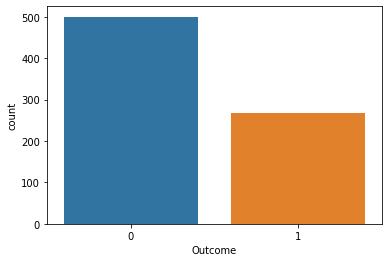

In [12]:
fig = plt.figure(figsize = (6,4))
sns.countplot(data = dataset, x = dataset['Outcome'])

plt.show()

Ahora vamos a ver la matriz de correlacion de pearson de nuestros datos.

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132    

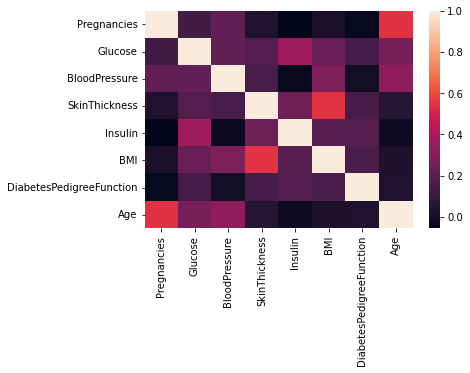

In [13]:
matriz=dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                'Age']].corr(method='pearson')
print(matriz)
sns.heatmap(matriz)
plt.show()

No podemos apreciar correlaciones muy fuertes e inmediatas entre dos variables, pero igualmente si que se ve algo de relacion.

Visto esto decidí que probaria los modelos (KNN,SVM y RandomForest) con estos datos pero ademas decidi hacer un PCA de los datos y hacerlos con los resultados de estos, ademas de intentarlo tambien quitando las columnas de SkinThicknes e Insulin ya que estas tambien podrian llegar a afectar al modelo por su forma.

(Siendo este un dataset tan pequeño usar un forest es un poco matar moscas a cañaonazos pero voy a hacer la excepcion de usarlo mas que nada para tambien ver el rendimiento de este.)

**Datos Originales:**

In [14]:
#dividimos en train y test
xl=dataset.drop('Outcome',axis=1)

x = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                'Age']].values
y = dataset['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

#Procesamos los datos ya que es un KNN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Comprobamos las dimensiones de nuestro test y train
print('Dimensiones de las características de train:', X_train.shape[0])
print('Dimensiones de las características de test:', X_test.shape[0])

Dimensiones de las características de train: 576
Dimensiones de las características de test: 192


**Datos sin las columnas de SkinThickness e Insulin**

In [15]:
x2 = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction',
                'Age']].values

X2_train, X2_test = train_test_split(x2, random_state=0)

#Procesamos los datos ya que es un KNN
scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

#Comprobamos las dimensiones de nuestro test y train
print('Dimensiones de las características de train:', X2_train.shape[0])
print('Dimensiones de las características de test:', X2_test.shape[0])

Dimensiones de las características de train: 576
Dimensiones de las características de test: 192


**PCA**

In [16]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(xl)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [17]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = xl.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8']
)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
PC1     0.269758  0.427707       0.368430       0.413430  0.284199  0.441899   
PC2    -0.538547  0.028505      -0.248287       0.313117  0.355771  0.291918   
PC3     0.071413  0.420781      -0.337361      -0.358756  0.499243 -0.430601   
PC4     0.142284 -0.355249      -0.099052       0.061228 -0.331496  0.029815   
PC5    -0.458087  0.268113       0.661756      -0.417759 -0.182040 -0.043765   
PC6     0.096639 -0.625024       0.432287      -0.054109  0.620082 -0.156219   
PC7    -0.512099 -0.047684       0.032781       0.505738 -0.048966 -0.484324   
PC8    -0.361145 -0.219504      -0.230482      -0.406642  0.116131  0.521836   

     DiabetesPedigreeFunction       Age  
PC1                  0.199329  0.349080  
PC2                  0.245292 -0.526791  
PC3                  0.342232  0.153434  
PC4                  0.847385  0.105612  
PC5                  0.241178 -0.112285  
PC6                  0.027204 -0.023647  
PC7                 -0.029984  0.490683  
PC8                 -0.071489  0.558572

Porcentaje de varianza explicada por cada componente
[0.27429654 0.20541242 0.13699051 0.11091846 0.09803673 0.06885833
 0.05724159 0.04824542]


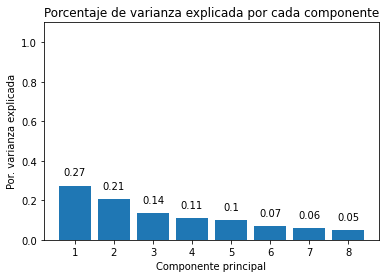

In [18]:
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x     = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for z, y in zip(np.arange(len(xl.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (z,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [19]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(xl.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for z, y in zip(np.arange(len(xl.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (z,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Porcentaje de varianza explicada acumulada
[0.27429654 0.47970896 0.61669946 0.72761792 0.82565465 0.89451299
 0.95175458 1.        ]


In [20]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=xl)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8'],
    index   = xl.index
)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.367089 -0.855621  0.126215  0.591647 -0.373059 -0.962491  0.684711   
1 -1.551803  0.154307 -0.545102  0.218014 -0.279764  0.183863  0.923721   
2  0.067711 -0.983219  1.799840  0.161999  0.039334 -1.565833 -0.383569   
3 -1.904743  0.544193 -0.370567 -0.622346 -0.130363  0.481072  0.052383   
4  1.232943  3.610773  2.290101  4.435950 -0.331068 -1.289958 -0.066024   

        PC8  
0  0.027863  
1  0.022577  
2 -1.405077  
3  0.006540  
4  1.067148

In [21]:
pro_train, pro_test = train_test_split(proyecciones, random_state=0)

#Procesamos los datos
scaler = MinMaxScaler()
pro_train = scaler.fit_transform(pro_train)
pro_test = scaler.transform(pro_test)

Una vez nuestros set de datos estan preparados, podemos empezar a entrenar los modelos.

**KNN**

Probamos varios k para el KNN para ver con cual hacer la prediccion de nuestro algoritmo.

Indice que mejor clasifica los datos de test: 9


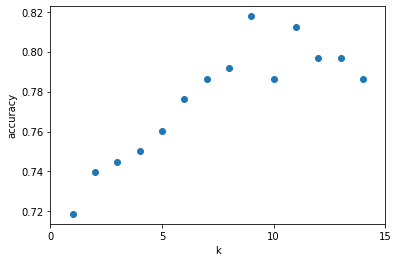

In [22]:
# Defino el rango de k que voy a probar
k_range = range(1, 15)

# Me guardo los resultados en una lista que voy a llamar scores, ademas saco el indice del mejor resultado
scores = []
max_n=0
max_ind=0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    if max_n < knn.score(X_test, y_test):
      max_n=knn.score(X_test, y_test)
      max_ind=k

# Grafico los resultados para poder visualizar cuál sería el k que me da una mayor accuracy e imprimo cual es
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15])
print('Indice que mejor clasifica los datos de test: {:.0f}'
     .format(max_ind))

Una vez elegido el k (9) para nuestros datos entrenamos el modelo y vemos el rendimiento que tiene a la hora de predecir.

In [23]:
# Llamamos al modelo con el k mas optimo y lo ajustamos
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [24]:
#Comprobamos los resultados del modelo
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[118  12]
 [ 23  39]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       130
           1       0.76      0.63      0.69        62

    accuracy                           0.82       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.81      0.82      0.81       192



Podemos ver que en general no predice demasiado bien ya que casi un 20% de los casos no acierta en la prediccion.

Ahora veamos si retirando las dos columnas funciona mejor el modelo.

Primero tenemos que ver cual sera el valor de K

Indice que mejor clasifica los datos de test: 7


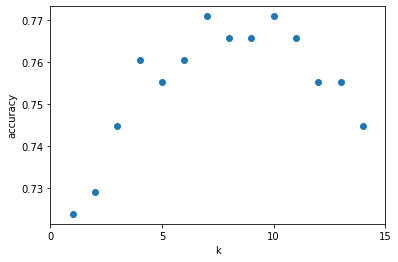

In [25]:
# Defino el rango de k que voy a probar
k_range = range(1, 15)

# Me guardo los resultados en una lista que voy a llamar scores, ademas saco el indice del mejor resultado
scores = []
max_n=0
max_ind=0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X2_train, y_train)
    scores.append(knn.score(X2_test, y_test))
    if max_n < knn.score(X2_test, y_test):
      max_n=knn.score(X2_test, y_test)
      max_ind=k

# Grafico los resultados para poder visualizar cuál sería el k que me da una mayor accuracy e imprimo cual es
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15])
print('Indice que mejor clasifica los datos de test: {:.0f}'
     .format(max_ind))

Una vez visto que el mejor valor para k es 7, hacemos el KNN sin las 2 columnas anteriormente retiradas

In [26]:
# Llamamos al modelo con el k mas optimo y lo ajustamos
knn = KNeighborsClassifier(7)
knn.fit(X2_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [27]:
#Comprobamos los resultados del modelo
pred = knn.predict(X2_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[112  18]
 [ 26  36]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       130
           1       0.67      0.58      0.62        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



Podemos ver que los resultados del KNN son peores que el KNN con las columnas.

Por ultimo nos queda probar este modelo con el PCA

Decidimos que K usar.

Indice que mejor clasifica los datos de test: 6


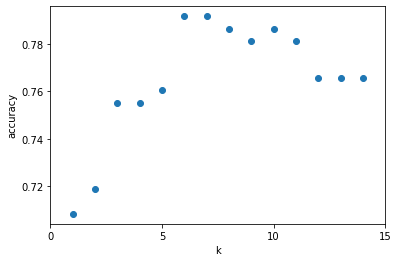

In [28]:
# Defino el rango de k que voy a probar
k_range = range(1, 15)

# Me guardo los resultados en una lista que voy a llamar scores, ademas saco el indice del mejor resultado
scores = []
max_n=0
max_ind=0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(pro_train, y_train)
    scores.append(knn.score(pro_test, y_test))
    if max_n < knn.score(pro_test, y_test):
      max_n=knn.score(pro_test, y_test)
      max_ind=k

# Grafico los resultados para poder visualizar cuál sería el k que me da una mayor accuracy e imprimo cual es
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15])
print('Indice que mejor clasifica los datos de test: {:.0f}'
     .format(max_ind))

En este caso solo elije 6 vecinos, ahora lo entrenamos.


In [29]:
# Llamamos al modelo con el k mas optimo y lo ajustamos
knn = KNeighborsClassifier(6)
knn.fit(pro_train, y_train)


KNeighborsClassifier(n_neighbors=6)

Comprobamos la precision del modelo

In [30]:
#Comprobamos los resultados del modelo
pred = knn.predict(pro_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[123   7]
 [ 33  29]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       130
           1       0.81      0.47      0.59        62

    accuracy                           0.79       192
   macro avg       0.80      0.71      0.73       192
weighted avg       0.79      0.79      0.77       192



Visto el modelo con los 3 resultados podriamos decir que no es rentable hacer modificaciones al dataset ya que estas no hace mas que empeorar los resultados.

**SVM**

Primero sacamos los mejores parametros de C y de gamma para nuestros datos

In [31]:
model = svm.SVC()

grid_search = GridSearchCV(model, param_grid={"C": [0.01, 0.1, 1, 10, 50, 100, 200], "gamma":[0.001, 0.01, 0.1, 1, 10]}, cv=4)

svmFit=grid_search.fit(X_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión media: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))

print("Los mejores parámetros han sido: {}".format(grid_search.best_params_))

Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.01}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.1}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 1}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 10}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.01}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.1}
Precisión media: 75.52 +/- 1.73 con parámetros {'C': 0.1, 'gamma': 1}
Precisión media: 66.32 +/- 1.59 con parámetros {'C': 0.1, 'gamma': 10}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 1, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 1, 'gamma': 0.01}
Precisión media: 76.22 +/- 1.42 con parámetros {'C': 1, 'gamma': 0.1}
Precisión media: 77.43 +/- 2.62 con parámetros {'C': 1, 'gamma

In [32]:
y2_predict=grid_search.predict(X_test)

print(classification_report(y_test,y2_predict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.77      0.78      0.77       192



Podemos ver que en general no predice demasiado bien ya que predice incluso peor que el KNN original, ya que mas del 20% de los casos no acierta.

Ahora veamos si retirando las dos columnas funciona mejor el modelo.

Primero sacamos los mejores parametros de C y de gamma para nuestros datos

In [33]:
model = svm.SVC()

grid_search = GridSearchCV(model, param_grid={"C": [0.01, 0.1, 1, 10, 50, 100, 200], "gamma":[0.001, 0.01, 0.1, 1, 10]}, cv=4)

svmFit=grid_search.fit(X2_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión media: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))

print("Los mejores parámetros han sido: {}".format(grid_search.best_params_))

Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.01}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.1}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 1}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 10}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.01}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.1}
Precisión media: 75.87 +/- 1.58 con parámetros {'C': 0.1, 'gamma': 1}
Precisión media: 71.35 +/- 3.20 con parámetros {'C': 0.1, 'gamma': 10}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 1, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 1, 'gamma': 0.01}
Precisión media: 75.69 +/- 1.55 con parámetros {'C': 1, 'gamma': 0.1}
Precisión media: 76.74 +/- 2.33 con parámetros {'C': 1, 'gamma

In [34]:
y2_predict=grid_search.predict(X2_test)

print(classification_report(y_test,y2_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       130
           1       0.74      0.52      0.61        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.78      0.79      0.77       192



Quitando las columnas predice un poco mejor pero sigue sin ser suficiente. 

Veamos ahora con el PCA.

Primero sacamos los mejores parametros de C y de gamma para nuestros datos

In [35]:
model = svm.SVC()

grid_search = GridSearchCV(model, param_grid={"C": [0.01, 0.1, 1, 10, 50, 100, 200], "gamma":[0.001, 0.01, 0.1, 1, 10]}, cv=4)

svmFit=grid_search.fit(pro_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión media: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))

print("Los mejores parámetros han sido: {}".format(grid_search.best_params_))

Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.01}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 0.1}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 1}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.01, 'gamma': 10}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.01}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 0.1, 'gamma': 0.1}
Precisión media: 64.76 +/- 1.14 con parámetros {'C': 0.1, 'gamma': 1}
Precisión media: 65.28 +/- 1.30 con parámetros {'C': 0.1, 'gamma': 10}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 1, 'gamma': 0.001}
Precisión media: 64.24 +/- 0.35 con parámetros {'C': 1, 'gamma': 0.01}
Precisión media: 68.58 +/- 1.80 con parámetros {'C': 1, 'gamma': 0.1}
Precisión media: 76.91 +/- 2.47 con parámetros {'C': 1, 'gamma

In [36]:
y2_predict=grid_search.predict(pro_test)

print(classification_report(y_test,y2_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



Dentro de los SVM, el que mejor predice es este, lo curioso es que toma valores de C y gamma mucho mas distintos que los otros dos, que tomaban valores similares.

**Random Forest**

Voy a hacer el random forest, para eso primero miro cuales serian los valores mas optimos para el bosque. 

In [37]:
n_estimators =[50, 64, 100, 128, 200]
max_features = [2, 3, 4, 5, 6]

In [38]:
parameter_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features}

In [39]:
rf_model = RandomForestClassifier()
grid_model = GridSearchCV(rf_model, parameter_grid)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 64, 100, 128, 200]})

In [40]:
grid_model.best_params_

{'max_features': 2, 'n_estimators': 50}

Una vez tengo los mejores parametros, hago una prediccion con el arbol que mejores resultados dio.

Derspues miro los resultados de precision.

In [41]:
prediction = grid_model.predict(X_test)

In [42]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.69      0.53      0.60        62

    accuracy                           0.77       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



El random forest hace una prediccion tambien con un 20% de error, estoy empezando a pensar que el problema es de los propios datos que no dan para mas de un 80 y poco %.

Igualmente sigamos probando con los otros dos conjuntos.

In [43]:
parameter_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features}

In [44]:
rf_model = RandomForestClassifier()
grid_model = GridSearchCV(rf_model, parameter_grid)
grid_model.fit(X2_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 64, 100, 128, 200]})

In [45]:
grid_model.best_params_

{'max_features': 4, 'n_estimators': 128}

Una vez tengo los mejores parametros, hago una prediccion con el arbol que mejores resultados dio.

Derspues miro los resultados de precision.

In [46]:
prediction = grid_model.predict(X2_test)

In [47]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       130
           1       0.67      0.60      0.63        62

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



Curiosamente, la reduccion de dimensiones hace que este reandom forest sea mejor que el que si que tiene todas las dimensiones (destacar que las diferencia entre unos y otros son pequeñas)

Por ultimo intentemoslo con el PCA

In [48]:
parameter_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features}

In [49]:
rf_model = RandomForestClassifier()
grid_model = GridSearchCV(rf_model, parameter_grid)
grid_model.fit(pro_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 64, 100, 128, 200]})

In [50]:
grid_model.best_params_

{'max_features': 4, 'n_estimators': 100}

In [52]:
prediction = grid_model.predict(pro_test)

In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       130
           1       0.69      0.56      0.62        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



Con todos estos datos y modelos entrenados podemos volver a la memoria para asi poder analizar estos con mas detalle.

In [ ]:
%%shell
jupyter nbconvert --to html /content/PEC2_Metodos_supervisados_AA_RodrigoRivas.ipynb